<a href="https://colab.research.google.com/github/emanuel379/Analise-de-Sobrevivencia-e-Confiabilidade/blob/main/Mini_Avalia%C3%A7%C3%A3o_2_Exerc%C3%ADcio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

**Exercício 4**

Um estudo experimental realizado com camundongos para verificar a eficácia da imunização pela malária foi realizado. Quarenta e quatro camundongos foram aleatorizados divididos em três grupos e todos foram infectados pela malária. Os camundongos do grupo 1 foram imunizados 30 dias antes da infecção. Além da infecção pela malária os camundongos dos grupos 1 e 3 foram, também, infectados pela esquistossomose. A resposta de interesse foi o tempo decorrido desde a infecção pela malária até a morte do camundongo. Este tempo foi medido em dias e o estudo foi acompanhado por 30 dias.

In [ ]:
# Dados grupo 1
data1 = pd.DataFrame({
    'temp1': [7,8,8,8,8,12,12,17,18,22,30,30,30,30,30,30],
    'cens1': [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0]
})

# Dados grupo 2
data2 = pd.DataFrame({
    'temp2': [8,8,9,10,10,14,15,15,18,19,21,22,22,23,25],
    'cens2': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
})

# Dados grupo 3
data3 = pd.DataFrame({
    'temp3': [8,8,8,8,8,8,9,10,10,10,11,17,19],
    'cens3': [1,1,1,1,1,1,1,1,1,1,1,1,1]
})

**a)** Construa as curvas de sobrevivências para os três grupos (como visto em aula, construa as tabelas e esboce os gráficos). Comente os resultados interpretando cada curva.

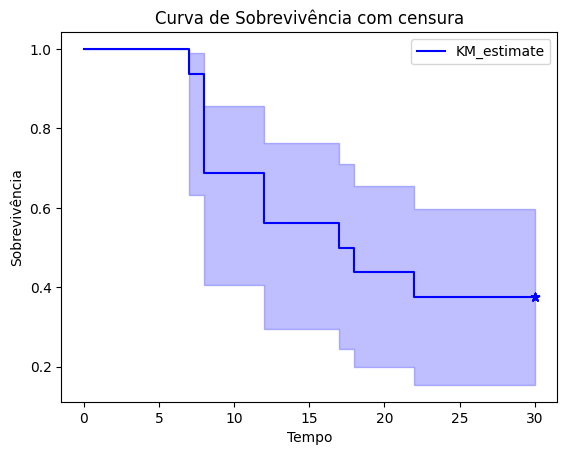

In [ ]:
# Grupo 1

# Ajustando uma curva de sobrevivência de Kaplan-Meier
kmf1 = KaplanMeierFitter()
kmf1.fit(data1['temp1'], event_observed=data1['cens1'])

# Plotando a curva de sobrevivência de Kaplan-Meier com intervalo de confiança por default
kmf1.plot(color='blue')

# Adicionando marcador de censura
censor_times = data1['temp1'][data1['cens1'] == 0]  # Get times of censoring events
plt.scatter(censor_times, kmf1.survival_function_.loc[censor_times], marker='*', color='blue', label='Censor Mark')

# Adicionando legendas
plt.xlabel('Tempo')
plt.ylabel('Sobrevivência')
plt.title('Curva de Sobrevivência com censura')
plt.show()

In [ ]:
# Construindo uma tabela com as informações do grupo 1
at_risk_df1 = kmf1.event_table

# Printando a tabela
print("Tabela de riscos e tempos:")
print(at_risk_df1.rename(columns={"at_risk": "Em risco", "censored": "Censurados", "removed": "Removidos", "observed": "Mortos", "entrance": "Amostra"}))

Tabela de riscos e tempos:
          Removidos  Mortos  Censurados  Amostra  Em risco
event_at                                                  
0.0               0       0           0       16        16
7.0               1       1           0        0        16
8.0               4       4           0        0        15
12.0              2       2           0        0        11
17.0              1       1           0        0         9
18.0              1       1           0        0         8
22.0              1       1           0        0         7
30.0              6       0           6        0         6


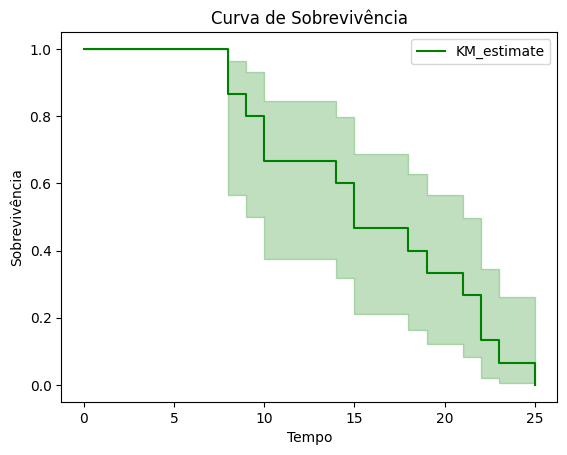

In [ ]:
# Grupo 2

# Ajustando uma curva de sobrevivência de Kaplan-Meier
kmf2 = KaplanMeierFitter()
kmf2.fit(data2['temp2'], event_observed=data2['cens2'])

# Plotando a curva de sobrevivência de Kaplan-Meier com intervalo de confiança por default
kmf2.plot(color='green')

# Adicionando legendas
plt.xlabel('Tempo')
plt.ylabel('Sobrevivência')
plt.title('Curva de Sobrevivência')
plt.show()

In [ ]:
# Construindo uma tabela com as informações do grupo 2
at_risk_df2 = kmf2.event_table

# Printando a tabela
print("Tabela de riscos e tempos:")
print(at_risk_df2.rename(columns={"at_risk": "Em risco", "censored": "Censurados", "removed": "Removidos", "observed": "Mortos", "entrance": "Amostra"}))

Tabela de riscos e tempos:
          Removidos  Mortos  Censurados  Amostra  Em risco
event_at                                                  
0.0               0       0           0       15        15
8.0               2       2           0        0        15
9.0               1       1           0        0        13
10.0              2       2           0        0        12
14.0              1       1           0        0        10
15.0              2       2           0        0         9
18.0              1       1           0        0         7
19.0              1       1           0        0         6
21.0              1       1           0        0         5
22.0              2       2           0        0         4
23.0              1       1           0        0         2
25.0              1       1           0        0         1


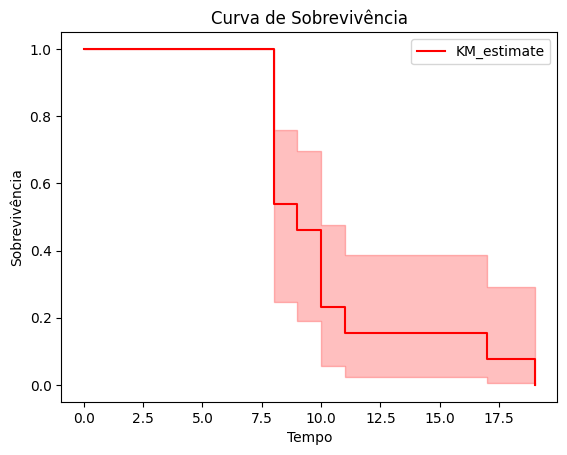

In [ ]:
# Grupo 3

# Ajustando uma curva de sobrevivência de Kaplan-Meier
kmf3 = KaplanMeierFitter()
kmf3.fit(data3['temp3'], event_observed=data3['cens3'])

# Plotando a curva de sobrevivência de Kaplan-Meier com intervalo de confiança por default
kmf3.plot(color='red')

# Adicionando legendas
plt.xlabel('Tempo')
plt.ylabel('Sobrevivência')
plt.title('Curva de Sobrevivência')
plt.show()

In [ ]:
# Construindo uma tabela com as informações do grupo 3
at_risk_df3 = kmf3.event_table

# Printando a tabela
print("Tabela de riscos e tempos:")
print(at_risk_df3.rename(columns={"at_risk": "Em risco", "censored": "Censurados", "removed": "Removidos", "observed": "Mortos", "entrance": "Amostra"}))

Tabela de riscos e tempos:
          Removidos  Mortos  Censurados  Amostra  Em risco
event_at                                                  
0.0               0       0           0       13        13
8.0               6       6           0        0        13
9.0               1       1           0        0         7
10.0              3       3           0        0         6
11.0              1       1           0        0         3
17.0              1       1           0        0         2
19.0              1       1           0        0         1


A partir dos dados observados, é possível observar que no grupo 1 uma quantidade significativa de indivíduos sobreviveu por um período maior que o de estudo, isto é, não foi possível observar o evento de interesse em uma parcela significativa da amostra coletada. Já para os grupos 2 e 3, observa-se uma mortalidade de 100% para os indivíduos observados antes da conclusão do período analisado.

**b)** Você acredita que existe diferença entre os grupos? Se sim, quais grupos são diferentes?

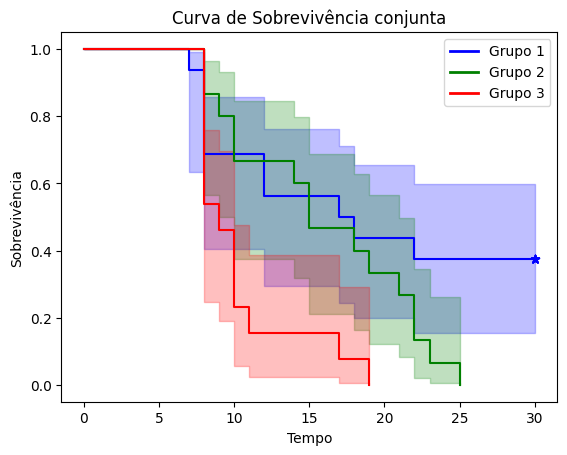

In [ ]:
# Plotando as curvas juntamente e analizando se existem intersecções em seus intervalos de confiança

# Plot Kaplan-Meier survival curve with confidence interval and censor marks for group 3
kmf1.plot(color='blue')
kmf2.plot(color='green')
kmf3.plot(color='red')

# Adicionando marcador de censura
censor_times = data1['temp1'][data1['cens1'] == 0]  # Get times of censoring events
plt.scatter(censor_times, kmf1.survival_function_.loc[censor_times], marker='*', color='blue', label='Censor Mark')

# Adicionando legendas
plt.xlabel('Tempo')
plt.ylabel('Sobrevivência')
plt.title('Curva de Sobrevivência conjunta')
colors = {'Grupo 1': 'blue', 'Grupo 2': 'green', 'Grupo 3': 'red'}
plt.legend(labels=colors.keys(), handles=[plt.Line2D([0], [0], color=color, lw=2) for color in colors.values()])
plt.show()

Com base na análise gráfica anterior, é possível concluir que, a um nével de significância de 5%, não há diferença significativa entre os grupos a princípio, entretanto, com o passar do tempo tal diferença se faz notar, o grupo 3, por exemplo, passa a decair muito mais rapidamente, de modo que todos os indivíduos estejam mortos antes de 20 dias, tal fato pode estar relacionado aos indivíduos desse grupo não terem recebido nenhum tipo de imunização ou reforço imunitário anterior a infecção, além de terem sido infectados por malária e esquistossomose, aumentando as chances e também as possíveis causas para o óbito. Já o grupo 2 tem uma queda mais lenta que o grupo anteriormente citado, uma vez que, embora não tenham sido imunizados ou submetidos a qualquer tratamento que melhorasse sua saúde imunológica, foram infectados apenas pela malária, diminuindo o número de causas para seu falecimento, apesar disso, todos os indivíduos desse grupo faleceram em no máximo 25 dias. O grupo 1 foi o que obteve os melhores resultados, especialmente se analizarmos o período pós t = 25, uma vez que, embora tenham sido infectados pela duas infermidades, foram vacinados contra a malária, de modo que sua mortalidade foi mais lenta, além de que, até o fim do estudo, uma parcela significativa sobreviveu às doenças, o que poderia trazer evidências de que a imunização pode ter sido eficaz contra a malária e que a esquistossomose não seja tão mortífera aos camundongos, sendo que uma parcela significativa deles s recuperou da doença.

**c)** Você tem alguma sugestão de como poderíamos embasar a especulação feita no item (b)?


Através de testes de hipótese, comparando, por exemplo, se a morbimortalidade dos indivíduos, após o período de estudo, é igual( contra a morbimortalidade para indivíduos imunizados é inferior), teste ANOVA para a igualdade das taxas, análise de Regressão de Cox, comparação entre os intervalos de confiança, etc.